# American sign language recognition
This project trains a ML model to recognise American Sign Language Gesture. The dataset used is based on the MNIST sign language dataset. It uses 2 csv files - one for training and one for testing. Each file contains a row with the sign label and all the 784 pixels of the 28 x 28 images.

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

## EDA

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


All columns are of type int. So, no need for any data conversions.

Checking for missing values

In [5]:
train.isna().sum().sum()

0

No missing values

### Checking class balance

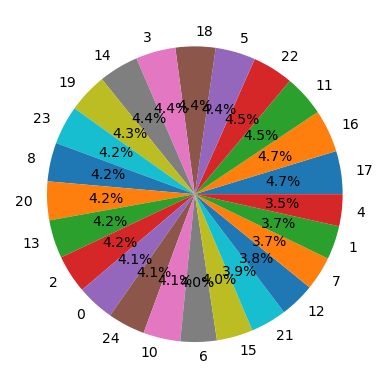

In [7]:
import matplotlib.pyplot as plt
classes = train['label'].value_counts()
plt.pie(classes.values,
        labels = classes.index,
        autopct='%1.1f%%')
plt.show()

In [9]:
train['label'].nunique()

24

There are 24 labels and all of them are more or less equally distributed.

In [60]:
train['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14], dtype=int64)

Here, we can see that the labels 9 and 25 are not there for the 26 alphabets. So, we need to readjust the labels so that the label values are continuous.

In [64]:
# Mapping dictionary
label_mapping = {0: 0, 1: 1, 2: 2,3:3,4:4,5:5,6:6,7:7,8:8,10:9,11:10,12:11,13:12,14:13,15:14,16:15,17:16,18:17,19:18,20:19,21:20,22:21,23:22,24:23}

# Relabeling
train['label'] = train['label'].replace(label_mapping)


In [66]:
train['label'].unique()

array([ 3,  6,  2, 12, 15,  8, 21, 17,  9, 19, 16, 18, 20, 22, 23,  1, 11,
       10, 14,  4,  0,  5,  7, 13], dtype=int64)

In [68]:
#Do similarly for test label
# Relabeling
test['label'] = test['label'].replace(label_mapping)

Lets see one of the images in the training set

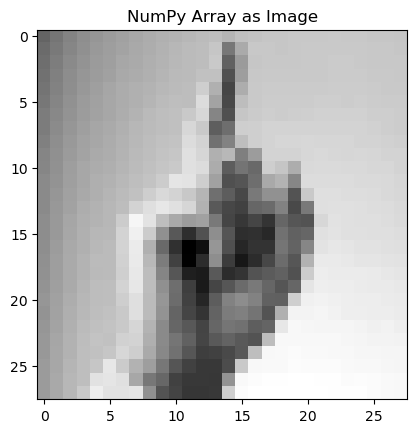

In [11]:
row_df = np.array(train.iloc[0,1:])#First row. First column is excluded as it is the label value
array = row_df.reshape(28, 28)#Converting to 2d array
# Display the array as an image
plt.imshow(array, cmap='gray')
#plt.colorbar()  # Optional: to show the color scale
plt.title('NumPy Array as Image')
plt.show()

## Training

Trying Random forest classifier and CNN for comparison

In [70]:
#Creating table for storing the results
table=pd.DataFrame({'Algorithm':[],'Precision':[],'Recall':[],'Accuracy':[]})
table

,Algorithm,Precision,Recall,Accuracy


In [72]:
#Spiltting the dataset into training and test sets
from sklearn.preprocessing import StandardScaler

X_train=train.copy()
y_train=X_train.pop('label')

X_test = test.copy()
y_test= X_test.pop('label')


#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [84]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)
new_row=pd.DataFrame({'Algorithm': ['Random Forest Classifier'],
                        'Precision': [precision_score(y_test,y_pred,average='weighted')],#Multi class
                        'Recall': [recall_score(y_test,y_pred,average='weighted')],
                        'Accuracy': [accuracy_score(y_test,y_pred)],
                        },
                       )
table=pd.concat([table,new_row],ignore_index=True)

In [98]:

table

,Algorithm,Precision,Recall,Accuracy
0,Random Forest Classifier,0.831886,0.815811,0.815811


### CNN

In [100]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))#First input layer - 32 is the no. of filters each of which are 3 x 3.
                                                                              #Also, image shape is 28x28x1
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())#Converting the image to 1D array
model.add(layers.Dense(24))#Final output layer
model.summary()


C:\Users\Anisha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3, 3, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 24)                  │          13,848 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,752 (288.09 KB)

 Trainable params: 73,752 (288.09 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
#We need to convert the train and test dataframe to 28x28x1 images and labels
train_images=[]
for i in range(train.shape[0]):
    row_df = np.array(train.iloc[i,1:])#First row. First column is excluded as it is the label value
    train_images.append(row_df.reshape(28, 28,1))#Converting to 2d array
train_labels = train['label']

test_images=[]
for i in range(test.shape[0]):
    row_df = np.array(test.iloc[i,1:])#First row. First column is excluded as it is the label value
    test_images.append(row_df.reshape(28, 28,1))#Converting to 2d array
test_labels = test['label']

# Normalize pixel values to be between 0 and 1
train_images, test_images = np.array(train_images) / 255.0, np.array(test_images) / 255.0


In [106]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#history = model.fit(train_images, train_labels, epochs=10, 
                   # validation_data=(test_images, test_labels))
history = model.fit(train_images, train_labels, epochs=10,  validation_split=0.2)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9959 - loss: 0.0125 - val_accuracy: 0.9976 - val_loss: 0.0066
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9946 - loss: 0.0154 - val_accuracy: 1.0000 - val_loss: 3.4624e-04
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 1.0000 - loss: 1.3700e-04 - val_accuracy: 1.0000 - val_loss: 1.3697e-04
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 1.0000 - loss: 6.9668e-05 - val_accuracy: 1.0000 - val_loss: 9.5954e-05
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 1.0000 - loss: 4.1098e-05 - val_accuracy: 1.0000 - val_loss: 7.8898e-05
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 1.0000 - loss: 2.8410e-05 - val_accuracy: 1.0000 - val_loss: 4.0955e-05
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 1.0000 - loss: 2.0187e-05 - val_accuracy: 1.0000 - val_loss: 3.0417e-05
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/ste

In [108]:
#Testing the deep learning model
#y_pred=model.predict(test_images)#Prints the probabilities

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [ ]:
#To get the class labels
'''
classes_test_data=(y_pred > 0.5).astype("int32")
#classes_test_data = np.array(classes_test_data)
classes_test_data
'''

In [112]:
#Evaluating the CNN
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

225/225 - 1s - 5ms/step - accuracy: 0.9331 - loss: 0.5256


In [118]:
# predict probabilities for test set
yhat_probs = model.predict(test_images, verbose=0)
# predict crisp classes for test set - Select the class with the highest probability
y_pred = np.argmax(yhat_probs, axis=1)

In [120]:
new_row=pd.DataFrame({'Algorithm': ['CNN'],
                        'Precision': [precision_score(test_labels,y_pred,average='weighted')],#Multi class
                        'Recall': [recall_score(test_labels,y_pred,average='weighted')],
                        'Accuracy': [test_acc],
                        },
                       )
table=pd.concat([table,new_row],ignore_index=True)

In [122]:
table

,Algorithm,Precision,Recall,Accuracy
0,Random Forest Classifier,0.831886,0.815811,0.815811
1,CNN,0.936246,0.933073,0.933073


From the above results, it is perfectly clear that the CNN model perfroms much better than the Random Classifier on the test images.